In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


# Load the dataset
accidents = pd.read_csv('Road_traffic_accidents.csv')

accidents



,Reference Number,Easting,Northing,Number of Vehicles,Accident Date,Time (24hr),1st Road Class,Road Surface,Lighting Conditions,Weather Conditions,Casualty Class,Casualty Severity,Sex of Casualty,Age of Casualty,Type of Vehicle
0,3309,429093,436258,1,1-Jan-09,55,Unclassified,Dry,Darkness: street lights present and lit,Fine without high winds,Pedestrian,Slight,Male,44,Car
1,2609,434723,435534,1,2-Jan-09,2335,Unclassified,Dry,Darkness: street lights present and lit,Fine without high winds,Driver,Serious,Female,23,Car
2,2809,441173,433047,1,2-Jan-09,1645,Unclassified,Dry,Darkness: street lights present and lit,Fine without high winds,Pedestrian,Slight,Female,12,Car
3,3809,428487,431364,1,2-Jan-09,1723,A,Dry,Darkness: street lights present and lit,Fine without high winds,Pedestrian,Slight,Male,15,Car
4,3909,425928,435480,2,2-Jan-09,1350,Unclassified,Dry,Daylight: street lights present,Fine without high winds,Driver,Slight,Female,34,Car
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3052,1100409,441649,434613,4,31-Dec-09,639,Motorway,Dry,Darkness: street lighting unknown,Fine without high winds,Driver,Slight,Male,42,Car
3053,1101709,438554,433797,1,31-Dec-09,1139,Motorway,Dry,Daylight: street lights present,Fine without high winds,Driver,Slight,Male,26,Car
3054,1103809,433646,435324,2,31-Dec-09,1914,Unclassified,Wet / Damp,Darkness: street lights present and lit,Fine without high winds,Passenger,Slight,Female,5,Car
3055,1107309,425112,436680,2,31-Dec-09,1330,Unclassified,Wet / Damp,Daylight: street lights present,Fine without high winds,Driver,Slight,Male,38,Car


In [10]:
# Display the first few rows and basic information about the dataset
print(accidents.head())
print(accidents.info())
print(accidents.describe(include='all'))


   Reference Number  Easting  Northing  Number of Vehicles Accident Date  \
0              3309   429093    436258                   1      1-Jan-09   
1              2609   434723    435534                   1      2-Jan-09   
2              2809   441173    433047                   1      2-Jan-09   
3              3809   428487    431364                   1      2-Jan-09   
4              3909   425928    435480                   2      2-Jan-09   

   Time (24hr) 1st Road Class Road Surface  \
0           55   Unclassified          Dry   
1         2335   Unclassified          Dry   
2         1645   Unclassified          Dry   
3         1723              A          Dry   
4         1350   Unclassified          Dry   

                       Lighting Conditions       Weather Conditions  \
0  Darkness: street lights present and lit  Fine without high winds   
1  Darkness: street lights present and lit  Fine without high winds   
2  Darkness: street lights present and lit  Fine with

In [11]:
# Convert 'Accident Date' to datetime format and extract relevant time features
accidents['Accident Date'] = pd.to_datetime(accidents['Accident Date'], format='%d-%b-%y')
accidents['Year'] = accidents['Accident Date'].dt.year
accidents['Month'] = accidents['Accident Date'].dt.month
accidents['Day'] = accidents['Accident Date'].dt.day
accidents['Day of Week'] = accidents['Accident Date'].dt.day_name()



In [12]:
# Check for missing values
missing_values = accidents.isnull().sum()
print(missing_values)

Reference Number       0
Easting                0
Northing               0
Number of Vehicles     0
Accident Date          0
Time (24hr)            0
1st Road Class         0
Road Surface           0
Lighting Conditions    0
Weather Conditions     0
Casualty Class         0
Casualty Severity      0
Sex of Casualty        0
Age of Casualty        0
Type of Vehicle        0
Year                   0
Month                  0
Day                    0
Day of Week            0
dtype: int64


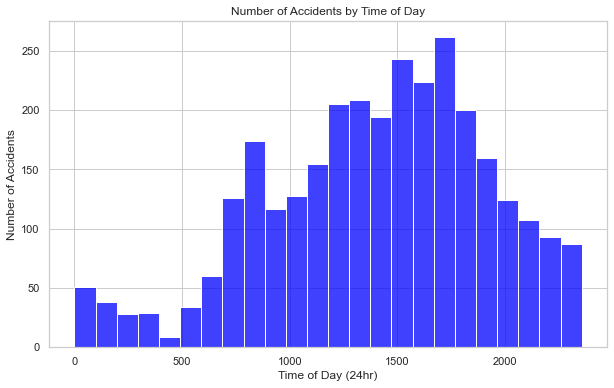

In [13]:

# Set the aesthetics for the plots
sns.set(style="whitegrid")

# Number of accidents by time of day

plt.figure(figsize=(10, 6))
sns.histplot(accidents['Time (24hr)'], bins=24, kde=False, color='blue')
plt.title('Number of Accidents by Time of Day')
plt.xlabel('Time of Day (24hr)')
plt.ylabel('Number of Accidents')
plt.grid(True)
plt.show()

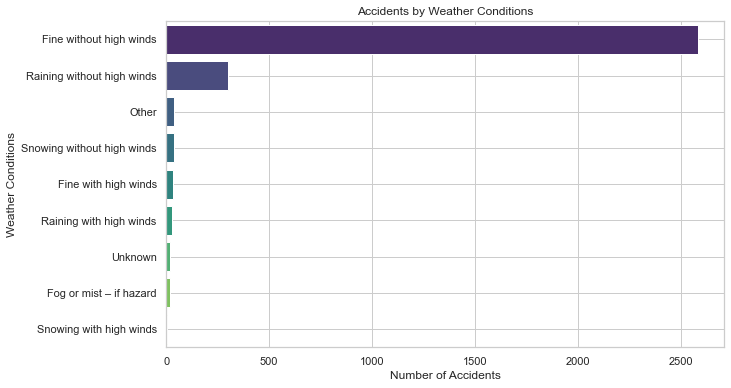

In [14]:
# Accidents by weather conditions

plt.figure(figsize=(10, 6))
sns.countplot(y='Weather Conditions', data=accidents, order=accidents['Weather Conditions'].value_counts().index, palette='viridis')
plt.title('Accidents by Weather Conditions')
plt.xlabel('Number of Accidents')
plt.ylabel('Weather Conditions')
plt.grid(True)
plt.show()

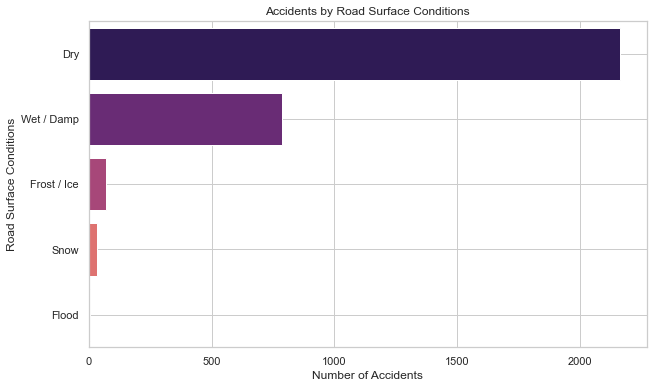

In [16]:
# Accidents by road surface conditions
plt.figure(figsize=(10, 6))
sns.countplot(y='Road Surface', data=accidents, order=accidents['Road Surface'].value_counts().index, palette='magma')
plt.title('Accidents by Road Surface Conditions')
plt.xlabel('Number of Accidents')
plt.ylabel('Road Surface Conditions')
plt.grid(True)
plt.show()

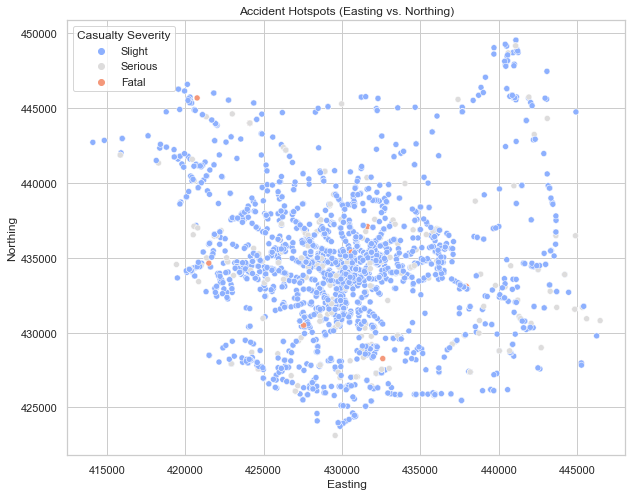

In [17]:
# Accident hotspots using Easting and Northing

plt.figure(figsize=(10, 8))
sns.scatterplot(x='Easting', y='Northing', hue='Casualty Severity', palette='coolwarm', data=accidents)
plt.title('Accident Hotspots (Easting vs. Northing)')
plt.xlabel('Easting')
plt.ylabel('Northing')
plt.legend(title='Casualty Severity')
plt.grid(True)
plt.show()